In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download adacslicml/breast-histopathology-images

 97% 155M/159M [00:01<00:00, 98.1MB/s]
100% 159M/159M [00:01<00:00, 100MB/s] 


In [ ]:
! unzip breast-histopathology-images

Streaming output truncated to the last 5000 lines.
  inflating: BreastCancer/train/1_Cancer/9077_idx5_x1701_y1351_class1.png  
  inflating: BreastCancer/train/1_Cancer/9077_idx5_x1751_y1451_class1.png  
  inflating: BreastCancer/train/1_Cancer/9077_idx5_x1751_y1851_class1.png  
  inflating: BreastCancer/train/1_Cancer/9077_idx5_x1751_y2101_class1.png  
  inflating: BreastCancer/train/1_Cancer/9077_idx5_x1751_y501_class1.png  
  inflating: BreastCancer/train/1_Cancer/9077_idx5_x1801_y1801_class1.png  
  inflating: BreastCancer/train/1_Cancer/9077_idx5_x1801_y1901_class1.png  
  inflating: BreastCancer/train/1_Cancer/9077_idx5_x1851_y2001_class1.png  
  inflating: BreastCancer/train/1_Cancer/9077_idx5_x1851_y2051_class1.png  
  inflating: BreastCancer/train/1_Cancer/9077_idx5_x1851_y601_class1.png  
  inflating: BreastCancer/train/1_Cancer/9077_idx5_x1851_y851_class1.png  
  inflating: BreastCancer/train/1_Cancer/9077_idx5_x1901_y1001_class1.png  
  inflating: BreastCancer/train/1_Cancer

In [ ]:
ls

BreastCancer/  breast-histopathology-images.zip  kaggle.json  sample_data/


In [ ]:
ls BreastCancer

test/  train/  valid/


In [ ]:
#ls BreastCancer/train/1_Cancer/

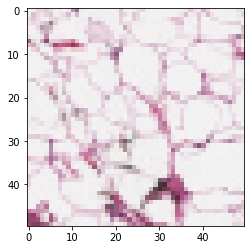

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('BreastCancer/train/0_NoCancer/9383_idx5_x951_y1901_class0.png')
imgplot = plt.imshow(img)
plt.show()

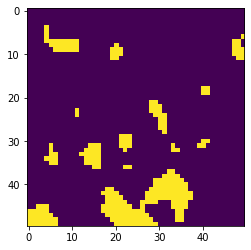

In [ ]:
import cv2
img = cv2.imread('BreastCancer/train/0_NoCancer/9383_idx5_x951_y1901_class0.png',0)
img = cv2.GaussianBlur(img, (5, 5), 0)
ret, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
imgplot = plt.imshow(img)
plt.show()

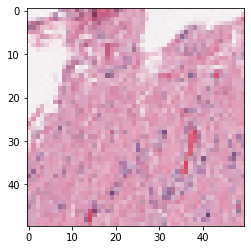

In [ ]:
img = mpimg.imread('BreastCancer/train/1_Cancer/13691_idx5_x2351_y1151_class1.png')
imgplot = plt.imshow(img)
plt.show()

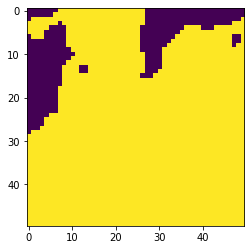

In [ ]:
img = cv2.imread('BreastCancer/train/1_Cancer/13691_idx5_x2351_y1151_class1.png',0)
img = cv2.GaussianBlur(img, (5, 5), 0)
ret, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# Make a parent directory `data` and two sub directories `train` and `valid`
%mkdir -p data/train
%mkdir -p data/valid
%mkdir -p data/test

# Inside the train and validation sub=directories, make sub-directories for each catgeory
%cd data
%mkdir -p train/1_Cancer
%mkdir -p train/0_NoCancer

%mkdir -p valid/1_Cancer
%mkdir -p valid/0_NoCancer

%mkdir -p test/1_Cancer
%mkdir -p test/0_NoCancer

%cd ..

/content/data
/content


In [ ]:
import numpy as np
import cv2
import os
from scipy import ndimage
from scipy.spatial import distance
from sklearn.cluster import KMeans
from google.colab.patches import cv2_imshow

# Return a dictionary that holds all images category by category. 
def load_images_from_folder(folder):
    images = {}
    ct = 0
    for filename in os.listdir(folder):
        category = []
        path = folder + "/" + filename
        #print(path)
        for cat in os.listdir(path)[:280]:
          ct += 1
          img = cv2.imread(path + "/" + cat,0)
          img = cv2.GaussianBlur(img, (5, 5), 0)
          ret, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
          if img is not None:
            name = folder.split('/')[-1]
            #print(str(filename))
            pt = str('/content/data/' + name + '/' + filename + '/'+ cat)
            print(pt)
            cv2.imwrite(pt, img)
          if img is not None:
            category.append(img)
          images[filename] = category
    #cv2_imshow(img)
    #print('image ->' + cat)
    print(ct)
    return images

images = load_images_from_folder('BreastCancer/train')  # take all train images category by category 
test = load_images_from_folder("BreastCancer/test") # take test images 

/content/data/train/0_NoCancer/10262_idx5_x301_y1701_class0.png
/content/data/train/0_NoCancer/9177_idx5_x2801_y1651_class0.png
/content/data/train/0_NoCancer/10262_idx5_x501_y501_class0.png
/content/data/train/0_NoCancer/8867_idx5_x2101_y451_class0.png
/content/data/train/0_NoCancer/9181_idx5_x451_y2451_class0.png
/content/data/train/0_NoCancer/12932_idx5_x2501_y2601_class0.png
/content/data/train/0_NoCancer/10272_idx5_x1851_y1101_class0.png
/content/data/train/0_NoCancer/15473_idx5_x2101_y301_class0.png
/content/data/train/0_NoCancer/12910_idx5_x551_y651_class0.png
/content/data/train/0_NoCancer/12954_idx5_x1101_y1301_class0.png
/content/data/train/0_NoCancer/15473_idx5_x851_y301_class0.png
/content/data/train/0_NoCancer/12870_idx5_x1101_y2501_class0.png
/content/data/train/0_NoCancer/12934_idx5_x2151_y1801_class0.png
/content/data/train/0_NoCancer/12626_idx5_x2501_y351_class0.png
/content/data/train/0_NoCancer/8914_idx5_x2401_y2701_class0.png
/content/data/train/0_NoCancer/14189_idx

In [ ]:
len(os.listdir('data/test/0_NoCancer'))

280

In [ ]:
len(images)

2

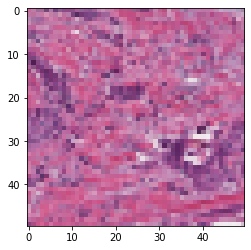

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/BreastCancer/train/1_Cancer/10258_idx5_x1451_y1001_class1.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/data/train/1_Cancer/10258_idx5_x1451_y1001_class1.png')
imgplot = plt.imshow(img)
plt.show()

FileNotFoundError: ignored

In [ ]:
#images['0_NoCancer'][0]

In [ ]:
type(images)

dict

In [ ]:
type(images['0_NoCancer'])

list

In [ ]:
type(images['0_NoCancer'][0])

numpy.ndarray

In [ ]:
!pip install opencv-python==3.4.2.17
!pip install opencv-contrib-python==3.4.2.17

     |████████████████████████████████| 25.0 MB 1.9 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 30.6 MB 53.3 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
def sift_features(images):
    sift_vectors = {}
    descriptor_list = []
    sift = cv2.xfeatures2d.SIFT_create()
    for key,value in images.items():
        features = []
        for img in value:
            #print(img)
            kp, des = sift.detectAndCompute(img, None)
            try:
              descriptor_list.extend(des)
            except:
              continue
            features.append(des)
        sift_vectors[key] = features
    return [descriptor_list, sift_vectors]

sifts = sift_features(images) 
# Takes the descriptor list which is unordered one
descriptor_list = sifts[0] 
# Takes the sift features that is seperated class by class for train data
all_bovw_feature = sifts[1] 
# Takes the sift features that is seperated class by class for test data
test_bovw_feature = sift_features(test)[1]

KeyboardInterrupt: ignored

In [ ]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras import Sequential
from keras.layers import Flatten, Dense
import os

In [ ]:
def extract(dataset):
  '''
  Extract feature from dataset
  Input: dataset
  '''
  from keras.applications.vgg16 import VGG16
  from keras.models import Model
  from keras.layers import Input, Flatten
  import tensorflow as tf

  # VGG16 standard input shape
  EXPECTED_DIM = (224, 224, 3)
  vgg16 = VGG16(weights='imagenet', include_top=False)
  input = Input(shape=EXPECTED_DIM, name='input')
  output = vgg16(input)
  x = Flatten(name='flatten')(output)
  extractor = Model(inputs=input, outputs=x)
  return extractor.predict(dataset)

In [ ]:
def scale(dataset):
  '''
  Normalize dataset
  Input: dataset
  '''
  from tensorflow.keras import layers
  normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
  normalized_ds = dataset.map(lambda x, y: (normalization_layer(x), y))
  return normalized_ds

In [ ]:
def make_dataset(dir_train,dir_test,dir_valid):
  '''
  Make dataset from directory
  Input: directory of dataset
  Example: "/content/datasets/gpiosenka/100-bird-species/train/"
  ''' 
  import tensorflow as tf

  # dataset is a numpy array of tensor shaped EXPECTED_DIM
  # features will be a numpy array of (dataset_rows, 25088)
  dataset_train = tf.keras.preprocessing.image_dataset_from_directory(dir_train,image_size=(224, 224),labels='inferred')
  dataset_test = tf.keras.preprocessing.image_dataset_from_directory(dir_test,image_size=(224, 224),labels='inferred')
  dataset_valid = tf.keras.preprocessing.image_dataset_from_directory(dir_valid,image_size=(224, 224),labels='inferred')
  
  #data_labels = dataset.labels
  #print(labels)

  return dataset_train,dataset_test,dataset_valid

In [ ]:
DIR_TRAIN = "data/train" #../input/100-bird-species/train/"
DIR_VALID = "BreastCancer/valid"#../input/100-bird-species/valid/"
DIR_TEST = "data/test"
classes = os.listdir(DIR_TRAIN)

In [ ]:
print(classes)

['0_NoCancer', '1_Cancer']


In [ ]:
# Create dataset
ds_train, ds_test, ds_valid = make_dataset(DIR_TRAIN,DIR_TEST,DIR_VALID)
ds_train_n, ds_test_n, ds_valid_n = scale(ds_train),scale(ds_test),scale(ds_valid)
#plot(ds_train)

Found 560 files belonging to 2 classes.
Found 560 files belonging to 2 classes.
Found 4163 files belonging to 2 classes.


In [ ]:
ds_train

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

TypeError: ignored

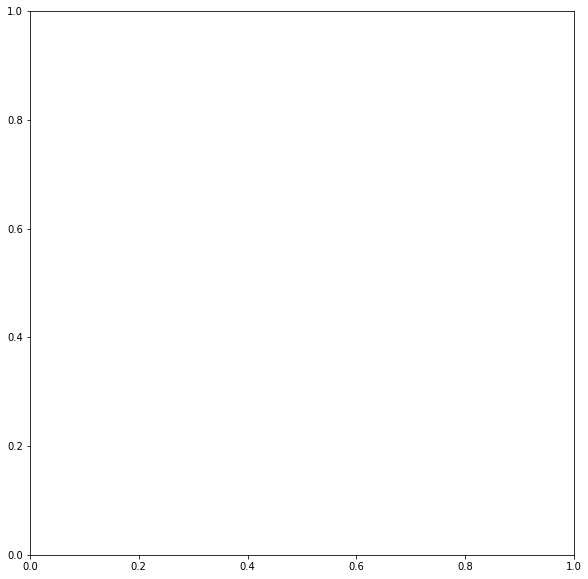

In [ ]:
plt.figure(figsize=(10, 10))
dataset = ds_train

class_names = dataset.class_names
for images, labels in dataset.take(1):
  img = images
  imgplot = plt.imshow(img)
  plt.show()
  

In [ ]:
def plot(dataset):
  '''
  Plot and visualize a dataset 
  Input: a dataset
  '''
  import matplotlib.pyplot as plt
  
  plt.figure(figsize=(10, 10))
  class_names = dataset.class_names
  for images, labels in dataset.take(1):
      print(images + "-->" + labels)
      for i in range(9):
          ax = plt.subplot(3, 3, i + 1)
          plt.imshow(images[i].numpy().astype("uint8"))
          plt.title(class_names[labels[i]])
          plt.axis("off")

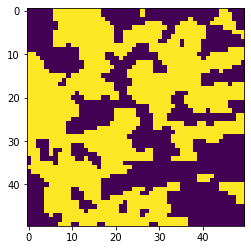

In [ ]:
img = mpimg.imread('/content/data/train/1_Cancer/10257_idx5_x1751_y1101_class1.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
ds_train

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
len(list(ds_train_n)) * batch_size

NameError: ignored

In [ ]:
len(ds_test)

NameError: ignored

In [ ]:
features_test = extract(ds_test_n)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
features_train = extract(ds_train_n)

In [ ]:
import pickle
with open('features.pickle', 'wb') as f:
    pickle.dump([features_test, features_train], f)

In [ ]:
import pickle
with open('features.pickle', 'rb') as f:
    features_test, features_train = pickle.load(f)

UnpicklingError: ignored

In [ ]:
features_train

array([[0.3480657 , 0.        , 0.1962423 , ..., 0.        , 0.2679241 ,
        0.        ],
       [0.12002602, 0.        , 0.45547536, ..., 0.        , 0.06562692,
        0.34742442],
       [0.32555053, 0.        , 0.21936744, ..., 0.        , 0.61509895,
        0.        ],
       ...,
       [0.13833651, 0.        , 0.        , ..., 0.        , 0.81796676,
        0.        ],
       [0.        , 0.        , 1.6699893 , ..., 0.        , 0.55995226,
        0.        ],
       [0.66009134, 0.        , 0.86771584, ..., 0.        , 0.720508  ,
        0.        ]], dtype=float32)

In [ ]:
len(features_train)

560

In [ ]:
len(features_test)

560

In [ ]:
n = 0
train_dict = {}
NoCan = []
Can = []
for i in features_train:
  n += 1
  if(n<=280):
    NoCan.append(i)
  else:
    Can.append(i)
train_dict['0_NoCancer'] = NoCan
train_dict['1_Cancer'] = Can

In [ ]:
n = 0
test_dict = {}
NoCan = []
Can = []
for i in features_test:
  n += 1
  if(n<=280):
    NoCan.append(i)
  else:
    Can.append(i)
test_dict['0_NoCancer'] = NoCan
test_dict['1_Cancer'] = Can

In [ ]:
#len(train['0_NoCancer'])
len(train['1_Cancer'])

NameError: ignored

In [ ]:
features_valid = extract(ds_valid_n)

KeyboardInterrupt: ignored

In [ ]:
def k_means(dataset,num_clusters,max_iter,n_runs):
  '''
  k-means clustering
  The number of clusters to form as well as the number of centroids to generate.
  num_clusters = 50
  Maximum number of iterations of the k-means algorithm for a single run.
  max_iter = 500
  Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive.
  n_runs = 20
  '''
  from sklearn.cluster import KMeans
  kmeans = KMeans(
      n_clusters=num_clusters, init='random',
      n_init=n_runs, max_iter=max_iter, 
      tol=1e-04, random_state=0
  )

  y_pred_km = kmeans.fit_predict(dataset)
  distortion = kmeans.inertia_
  centroids = kmeans.cluster_centers_

  return y_pred_km,centroids,distortion

In [ ]:
def pca(features,n_components):
  '''
  Dimensionality reduction on extracted features
  Input: dataset to do PCA, number of components
  '''
  from sklearn.decomposition import PCA
  print(features.shape)

  pca = PCA(n_components=200)
  pca.fit(features)
  reduced_features = pca.transform(features)
  print(reduced_features.shape)
  return reduced_features

In [ ]:
# Dimension reduce
num_components = 200
features_train_r = pca(features_train,num_components)
features_test_r = pca(features_train,num_components)
#features_valid_r = pca(features_valid,num_components)

(560, 25088)
(560, 200)
(560, 25088)
(560, 200)


In [ ]:
# Clustering
num_clusters = 10
max_iter = 300
n_runs = 10  
train_pred,train_centriods,train_distortion = k_means(features_train_r,num_clusters,max_iter,n_runs)
print("distortion:",train_distortion)

distortion: 295281.625


In [ ]:
type(features_train)

numpy.ndarray

In [ ]:
def kmeans(k, descriptor_list):
    kmeans = KMeans(n_clusters = k, n_init=10)
    kmeans.fit(descriptor_list)
    visual_words = kmeans.cluster_centers_ 
    return visual_words
    
# Takes the central points which is visual words    
visual_words = kmeans(19, features_train) 

In [ ]:
type(features_train)

numpy.ndarray

In [ ]:
def developVocabulary(n_images, descriptor_list, kmeans_ret):
  mega_histogram = np.array([np.zeros(10) for i in range(n_images)])
  for i in range(n_images):
    old_count = 0
    l = len(descriptor_list[i])
    for j in range(l):
      if kmeans_ret is not None:
        idx = kmeans_ret[old_count+j]
      mega_histogram[i][idx] += 1
      old_count += l
  print("Vocabulary Histogram Generated")


In [ ]:

developVocabulary(len(features_train_r),features_train_r,train_pred)

IndexError: ignored

In [ ]:
def find_index(image, center):
    count = 0
    ind = 0
    for i in range(len(center)):
        if(i == 0):
           count = distance.euclidean(image, center[i]) 
           #count = L1_dist(image, center[i])
        else:
            dist = distance.euclidean(image, center[i]) 
            #dist = L1_dist(image, center[i])
            if(dist < count):
                ind = i
                count = dist
    return ind

def image_class(all_bovw, centers):
    dict_feature = {}
    for key,value in all_bovw.items():
        category = []
        for img in value:
            histogram = np.zeros(len(centers))
            for each_feature in img:
                ind = find_index(each_feature, centers)
                histogram[ind] += 1
            category.append(histogram)
        dict_feature[key] = category
    return dict_feature
    
# Creates histograms for train data    
#bovw_train = image_class(train_dict, train_centriods) 
# Creates histograms for test data
#bovw_test = image_class(test_bovw_feature, visual_words) 

In [ ]:
def find_index(image, center):
    count = 0
    ind = 0
    for i in range(len(center)):
        if(i == 0):
           count = distance.euclidean(image, center[i]) 
           #count = L1_dist(image, center[i])
        else:
            dist = distance.euclidean(image, center[i]) 
            #dist = L1_dist(image, center[i])
            if(dist < count):
                ind = i
                count = dist
    return ind

def image_class(all_bovw, centers):
    dict_feature = {}
    for key,value in all_bovw.items():
        category = []
        print(key)
        ct=0
        for img in value:
            ct+=1
            print(key + '--->'+ str(ct))
            histogram = np.zeros(len(centers))
            nooo = 0
            for each_feature in img:
                nooo+=1
                print(key + '--->'+ str(ct) + '--->' + str(nooo))
                ind = find_index(each_feature, centers)
                histogram[ind] += 1
            category.append(histogram)
        dict_feature[key] = category
    return dict_feature
    
# Creates histograms for train data    
bovw_train = image_class(train_dict, train_centriods) 
# Creates histograms for test data


Streaming output truncated to the last 5000 lines.
0_NoCancer--->33--->18545
0_NoCancer--->33--->18546
0_NoCancer--->33--->18547
0_NoCancer--->33--->18548
0_NoCancer--->33--->18549
0_NoCancer--->33--->18550
0_NoCancer--->33--->18551
0_NoCancer--->33--->18552
0_NoCancer--->33--->18553
0_NoCancer--->33--->18554
0_NoCancer--->33--->18555
0_NoCancer--->33--->18556
0_NoCancer--->33--->18557
0_NoCancer--->33--->18558
0_NoCancer--->33--->18559
0_NoCancer--->33--->18560
0_NoCancer--->33--->18561
0_NoCancer--->33--->18562
0_NoCancer--->33--->18563
0_NoCancer--->33--->18564
0_NoCancer--->33--->18565
0_NoCancer--->33--->18566
0_NoCancer--->33--->18567
0_NoCancer--->33--->18568
0_NoCancer--->33--->18569
0_NoCancer--->33--->18570
0_NoCancer--->33--->18571
0_NoCancer--->33--->18572
0_NoCancer--->33--->18573
0_NoCancer--->33--->18574
0_NoCancer--->33--->18575
0_NoCancer--->33--->18576
0_NoCancer--->33--->18577
0_NoCancer--->33--->18578
0_NoCancer--->33--->18579
0_NoCancer--->33--->18580
0_NoCancer---

KeyboardInterrupt: ignored

In [ ]:
bovw_test = image_class(test_dict, train_centriods) 

In [ ]:
import pickle
with open('test.pickle', 'wb') as f:
    pickle.dump(bovw_test, f)

In [ ]:
type(bovw_train)

dict

In [ ]:
import pickle
with open('test.pickle', 'rb') as f:
    bovw_test = pickle.load(f)

In [ ]:
import pickle
with open('train.pickle', 'rb') as f:
    bovw_train = pickle.load(f)

In [ ]:
bovw_train['1_Cancer']

[array([    0., 22168.,  2920.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.]),
 array([    0., 22716.,  2372.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.]),
 array([    0., 22308.,  2780.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.]),
 array([    0., 22584.,  2504.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.]),
 array([    0., 22652.,  2436.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.]),
 array([    0., 22635.,  2453.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.]),
 array([    0., 22610.,  2478.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.]),
 array([    0., 22445.,  2643.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.]),
 array([    0., 22335.,  2753.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.]),
 array([    0., 22833.,  2255.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.]),
 array([    0., 2239

In [ ]:
import pickle
pickle.dump(results_bowl, open("data_19.pkl", "wb"))

NameError: ignored

In [ ]:
#type(bovw_train)
#type(bovw_train['0_NoCancer'])
#bovw_train['0_NoCancer'][0]

In [ ]:
import pickle
dictionary_data = {"kmeans_19": visual_words, "train":bovw_train, "test":bovw_test}

a_file = open("data_19.pkl", "wb")
pickle.dump(dictionary_data, a_file)
a_file.close()

In [ ]:
def knn(images, tests):
    num_test = 0
    correct_predict = 0
    class_based = {}
    
    for test_key, test_val in tests.items():
        class_based[test_key] = [0, 0] # [correct, all]
        for tst in test_val:
            predict_start = 0
            #print(test_key)
            minimum = 0
            key = "a" #predicted
            for train_key, train_val in images.items():
                for train in train_val:
                    if(predict_start == 0):
                        minimum = distance.euclidean(tst, train)
                        #minimum = L1_dist(tst,train)
                        key = train_key
                        predict_start += 1
                    else:
                        dist = distance.euclidean(tst, train)
                        #dist = L1_dist(tst,train)
                        if(dist < minimum):
                            minimum = dist
                            key = train_key
            
            if(test_key == key):
                correct_predict += 1
                class_based[test_key][0] += 1
            num_test += 1
            class_based[test_key][1] += 1
            #print(minimum)
    return [num_test, correct_predict, class_based]
    
# Call the knn function    
results_bowl = knn(bovw_train, bovw_test)

In [ ]:
import pickle
pickle.dump(results_bowl, open("model.pkl", "wb"))

In [ ]:
def accuracy(results):
    avg_accuracy = (results[1] / results[0]) * 100
    print("Average accuracy: " + str(avg_accuracy) + " %")
    print("\nClass based accuracies: \n")
    for key,value in results[2].items():
        acc = (value[0] / value[1]) * 100
        print(key + " : " + str(acc) + " %")
        
# Calculates the accuracies and write the results to the console.       
accuracy(results_bowl) 

Average accuracy: 50.0 %

Class based accuracies: 

0_NoCancer : 0.0 %
1_Cancer : 100.0 %


In [ ]:
results_bowl

[560, 280, {'0_NoCancer': [0, 280], '1_Cancer': [280, 280]}]

In [ ]:
test2 = 2887*['0NoCancer']
predi3 = 2008*['0NoCancer']
predi4 = 879*['1Cancer']
test = 1166*['1Cancer']
predi = 556*['1Cancer']
predi2 = 610*['0NoCancer']
test.extend(test2)
predi.extend(predi2)
predi.extend(predi3)
predi.extend(predi4)
#test
type(predi)
len(predi)

4053

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(test, predi)
print(cm)

[[2008  879]
 [ 610  556]]


In [ ]:
print(classification_report(test, predi))

              precision    recall  f1-score   support

   0NoCancer       0.77      0.70      0.73      2887
     1Cancer       0.39      0.48      0.43      1166

    accuracy                           0.63      4053
   macro avg       0.58      0.59      0.58      4053
weighted avg       0.66      0.63      0.64      4053



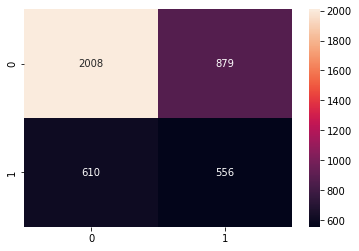

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True,fmt='d')